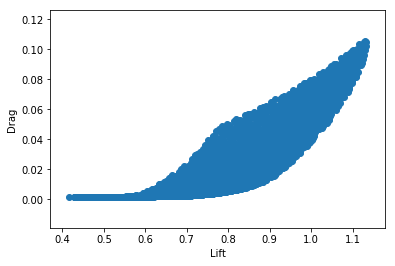

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Activation
import keras

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt



import numpy as np

qmc_points = np.loadtxt('../sobol_4_8000.txt')
qmc_points = qmc_points[1:].reshape((8000,4))
qmc_points=qmc_points[:,1:3]
all_points = qmc_points.copy()
forces = np.array(np.loadtxt('../force_L2_scaled.dat'))

plt.scatter(forces[:,1], forces[:,2])
plt.xlabel("Lift")
plt.ylabel("Drag")
plt.show()

N = min(qmc_points.shape[0], forces.shape[0])
qmc_points = qmc_points[:N,:]
forces  = forces[:N,:]

#permuted_indices = np.random.permutation(N)
#qmc_points=qmc_points[permuted_indices,:]
#forces = forces[permuted_indices,:]
input_size=2
force_component = 1
train_size=32
validation_size=200



compiled

optimizing
optimized


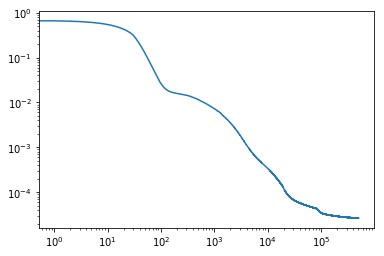

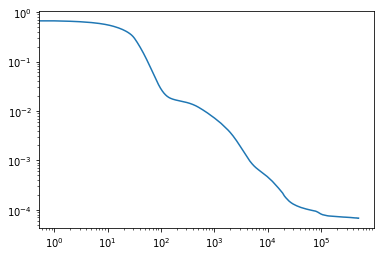

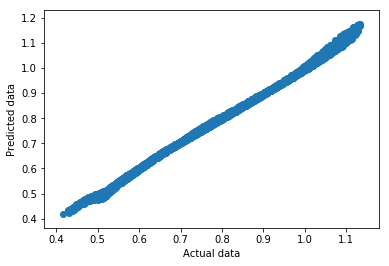

compiled

optimizing


IndexError: pop from empty list

In [15]:

for i in range (1):#qmc_points.shape[0]//train_size-1):
    model = Sequential([
        Dense(5, input_shape=(input_size,)),
        Activation('relu'),
        Dense(10),
        Activation('relu'),
        Dense(5),
        Activation('relu'),
        Dense(1)
    ])
    model.compile(optimizer=keras.optimizers.SGD(lr=0.001),
                  loss='mean_squared_error')
    print("compiled")
    x_train = qmc_points[i*train_size:(i+1)*train_size,:]
    y_train=forces[i*train_size:(i+1)*train_size,force_component]
    
    
    #x_val = qmc_points[train_size:validation_size+train_size,:]
    #y_val=forces[train_size:train_size+validation_size,force_component]
    x_val=np.zeros((validation_size, qmc_points.shape[1]))
    for n in range(qmc_points.shape[1]):
        x_val[:,n] = np.delete(qmc_points[:,n], slice(i*train_size,(i+1)*train_size))[:validation_size]

    #x_val = np.delete(qmc_points, slice(i*train_size,(i+1)*train_size))[:validation_size]

    y_val= np.delete(forces[:,force_component], slice(i*train_size,(i+1)*train_size))[:validation_size]
    print()
    epochs=500000
    print("optimizing")
    hist = model.fit(x_train, y_train,
              batch_size=train_size//4, epochs=epochs,shuffle=True,
              validation_data=(x_val, y_val),verbose=0)
    print("optimized")
    epochs_r=range(1, epochs)
    plt.loglog(hist.history['loss'])
    plt.show()
    #plt.loglog(hist.history['loss'][4:])
    #plt.show()
    #plt.loglog(hist.history['loss'][400:])
    #plt.show()
    plt.loglog(hist.history['val_loss'])
    plt.show()
    #plt.loglog(hist.history['val_loss'][4:])
    #plt.show()
    #plt.loglog(hist.history['val_loss'][400:])
    #plt.show()
    x_test =  qmc_points
    y_test = forces[:,force_component]
    y_predict = model.predict(x_test)
    plt.scatter(y_test, y_predict)
    plt.xlabel("Actual data")
    plt.ylabel("Predicted data")
    plt.show()

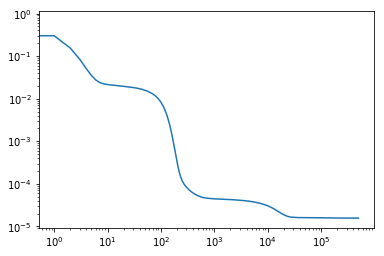

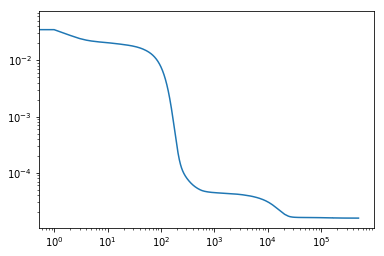

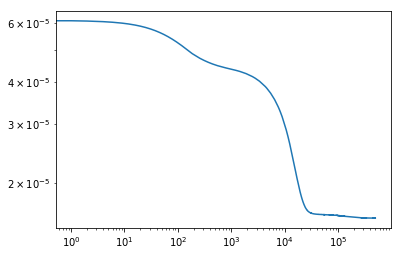

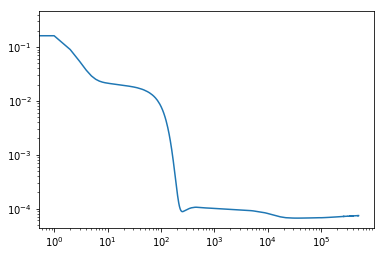

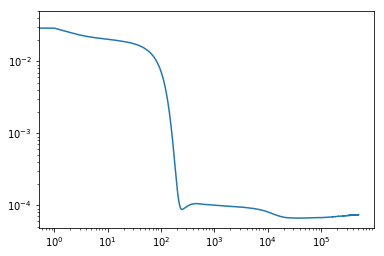

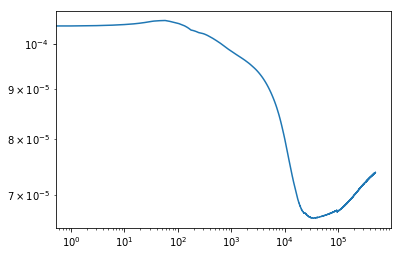

Text(0,0.5,'Predicted data')

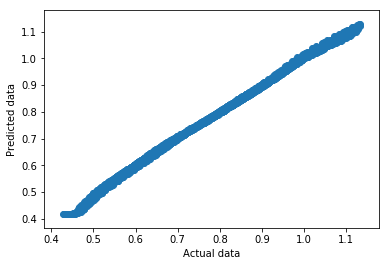

In [2]:
model = Sequential([
    Dense(5, input_shape=(input_size,)),
    Activation('relu'),
    Dense(10),
    Activation('relu'),
    Dense(19),
    Activation('relu'),
    Dense(5),
    Activation('relu'),
    Dense(5),
    Activation('relu'),
    Dense(1)
])
model.compile(optimizer=keras.optimizers.SGD(lr=0.1),
              loss='mean_squared_error')
x_train = qmc_points[:train_size,:]
y_train=forces[:train_size,force_component]


x_val = qmc_points[train_size:validation_size+train_size,:]
y_val=forces[train_size:train_size+validation_size,force_component]
epochs=500000

hist = model.fit(x_train, y_train,
          batch_size=train_size, epochs=epochs,shuffle=True,
          validation_data=(x_val, y_val),verbose=0)

epochs_r=range(1, epochs)
plt.loglog(hist.history['loss'])
plt.show()
plt.loglog(hist.history['loss'][4:])
plt.show()
plt.loglog(hist.history['loss'][400:])
plt.show()
plt.loglog(hist.history['val_loss'])
plt.show()
plt.loglog(hist.history['val_loss'][4:])
plt.show()
plt.loglog(hist.history['val_loss'][400:])
plt.show()
x_test =  qmc_points[validation_size+train_size:,:]
y_test = forces[train_size+validation_size:,force_component]
y_predict = model.predict(x_test)
plt.scatter(y_test, y_predict)
plt.xlabel("Actual data")
plt.ylabel("Predicted data")

(3001,)
(2769,)


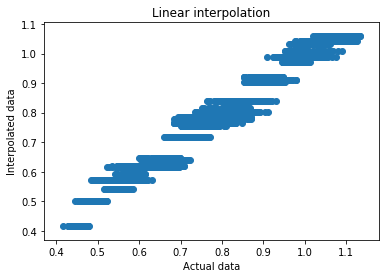

Text(0,0.5,'Interpolated data')

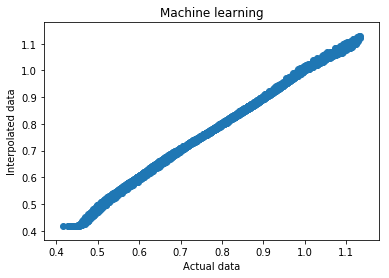

In [5]:
import scipy.interpolate
interpolated = scipy.interpolate.griddata(qmc_points[:train_size,:], y_train, qmc_points,method='nearest')
interpolated[np.isnan(interpolated)] = 2
print(interpolated.shape)
print(y_test.shape)
plt.scatter(forces[:,force_component], interpolated)
plt.title("Linear interpolation")
plt.xlabel("Actual data")
plt.ylabel("Interpolated data")
plt.show()

plt.scatter(forces[:,force_component], model.predict(qmc_points))
plt.title("Machine learning")
plt.xlabel("Actual data")
plt.ylabel("Interpolated data")

In [11]:
def myvar(x):
    mean = np.sum(x)/x.shape[0]
    var = np.sum((mean-x)**2)/x.shape[0]
    return var
    
def mymean (x): 
    return np.sum(x)/x.shape[0]

variance_top = myvar(forces[:, force_component])
print("variance single level = %f" % variance_top)
predicted = model.predict(qmc_points)
predicted = predicted.reshape(qmc_points.shape[0])
variance_diff_ml = myvar(forces[:, force_component] - predicted)


print("variance diff ml = %f " % variance_diff_ml)
print("speedup = %f" % (variance_top/variance_diff_ml/2.))
print((forces[:, force_component] - interpolated).shape)
variance_diff_interpolate =myvar(forces[:, force_component] - interpolated)
print("variance_diff_interpolate = %f" % variance_diff_interpolate)

mean_qmc = np.mean(forces[:,force_component])
print("mean_qmc = %f" % mean_qmc)
mean_ml = np.mean(model.predict(qmc_points))
print("mean_ml = %f" % mean_ml)
mean_few_qmc = np.mean(qmc_points[:train_size,:])

print("mean_few_qmc = %f" % mean_few_qmc)
predicted_all = model.predict(all_points)
predicted_all = predicted_all.reshape(all_points.shape[0])
print(predicted_all.shape)
mean_mlmlmc = mymean(predicted[:train_size]-forces[:train_size,force_component]) + mymean(predicted_all)

print("mean_mlmlmc = %f" % mean_mlmlmc)
var_qmc = np.var(forces[:,force_component])
print("var_qmc = %f" % var_qmc)
var_ml = np.var(model.predict(qmc_points))
print("var_ml = %f" % var_ml)
var_few_qmc = np.var(qmc_points[:train_size,:])

print("var_few_qmc = %f" % var_few_qmc)
print(qmc_points.shape)





variance single level = 0.027996
variance diff ml = 0.000066 
speedup = 212.441239
(3001,)
variance_diff_interpolate = 0.001302
mean_qmc = 0.776756
mean_ml = 0.775419
mean_few_qmc = 0.484375
(8000,)
mean_mlmlmc = 0.775589
var_qmc = 0.027996
var_ml = 0.028575
var_few_qmc = 0.083252
(3001, 2)


# Integration test for QMC
Here we integrate with different subsets for the QMC points to test the error

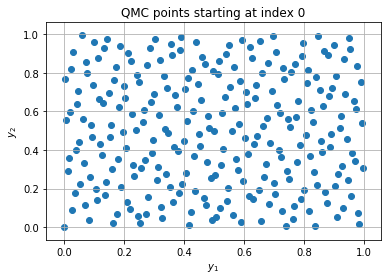

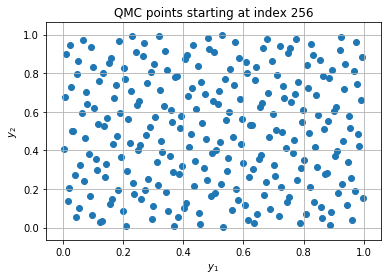

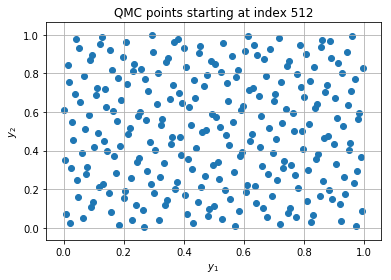

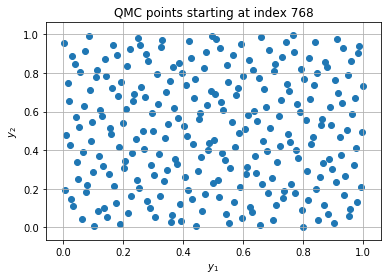

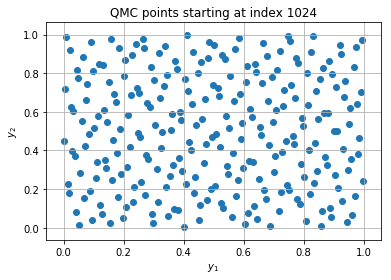

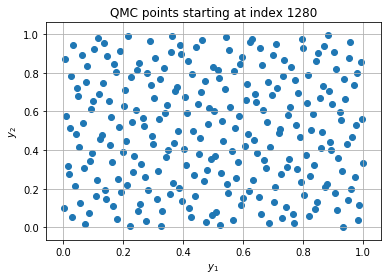

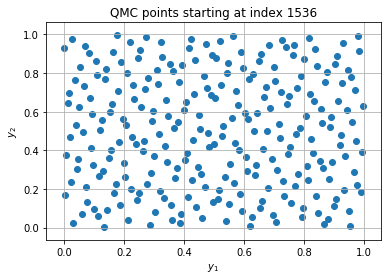

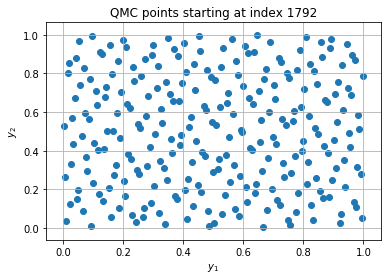

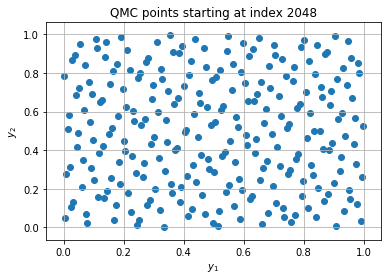

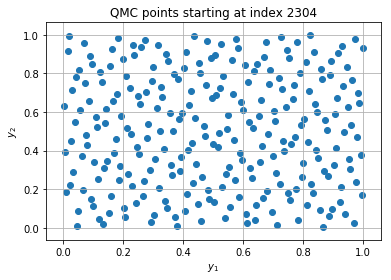

Text(0,0.5,'Error')

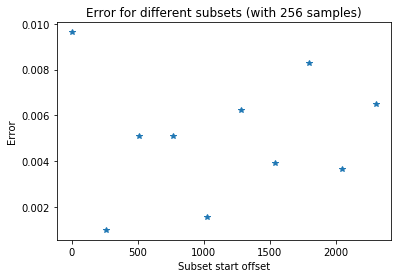

In [41]:
import scipy
import scipy.integrate
fs_base = [lambda x,y: x**2 + y**2,
      lambda x,y: np.sin(x)+np.cos(y),
      lambda x,y: x**2 - y**2,
      lambda x,y: np.sin(4*np.pi*x)+np.cos(4*np.pi*y)]
train_size=256
fs = []
for f in fs_base:
    fs.append(f)
coefficients = [-2.2, 0.2,0.8,1,2,4.5]
#coefficients = [-2,0,2]
for a in coefficients:
    for b in coefficients:
        for c in coefficients:
            for d in coefficients:
                for e in coefficients:
                    for g in coefficients:
                        fs.append(lambda x,y: a*x**2 + b*y**2+c*np.sin(d*x) + np.cos(e*y+g*x))
                        

                        
                        
                        

Is = [scipy.integrate.dblquad(f, 0, 1, lambda x: 0, lambda x: 1)[0] for f in fs]
errors  = []
subsets = []
for subset in range(qmc_points.shape[0]//train_size-1):
    
    integration_points = qmc_points[subset*train_size:(subset+1)*train_size,:2]
    error = 0
    for f,I in zip(fs, Is):
  
        I_approx = 1/train_size * sum (f(integration_points[:,0], integration_points[:,1]))
        error += abs(I-I_approx)
    error /= len(fs)
    errors.append(error)
    subsets.append(subset)
    plt.scatter(integration_points[:,0], integration_points[:,1])
    plt.title('QMC points starting at index %d' % (subset*train_size))
    plt.xlabel("$y_1$")
    plt.grid(True)
    
    plt.ylabel("$y_2$")
    plt.show()

plt.plot(np.array(subsets)*train_size, errors, '*')
plt.title("Error for different subsets (with %d samples)" % train_size)
plt.xlabel("Subset start offset")
plt.ylabel("Error") 

In [ ]:
/